# Z-statistic and t-statistic
#### by Elizabeth Barnes

This example gives a brief introduction to the z-statistic and t-statistic and how one uses software (rather than look-up tables) to get the necessary information.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10.0/2, 7.0/2)

Okay, so step 1 is to plot the PDF of a Guassian. How do we do that? Well, in python, we can use the stats package, making sure to denote the mean and standard deviation we want (in this case, I went with a standard normal).

In [2]:
x = np.arange(-6,6,.01)
z = stats.norm.pdf(x,0,1)

Now let's plot the resulting PDF $Z$.

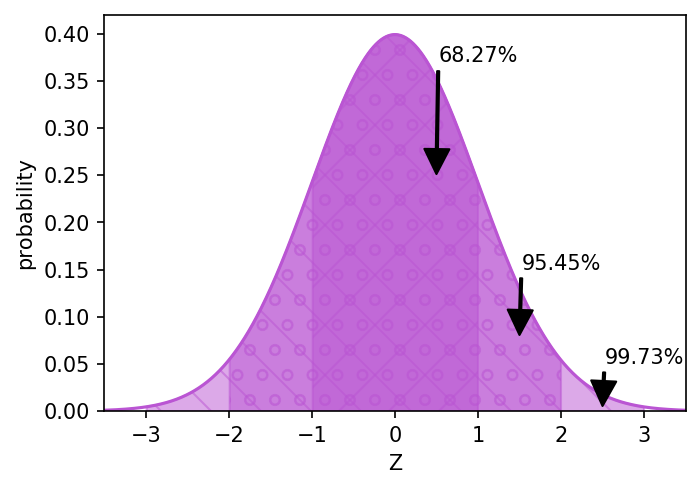

In [3]:
plt.figure()
plt.plot(x,z, color = 'mediumorchid', label = 'Z')

plt.ylim(0,.42)
plt.xticks(np.arange(-5,5,1))
plt.xlim(-3.5,3.5)

plt.xlabel('Z')
plt.ylabel('probability')

xshade = np.where(abs(x)<=3.,x,np.NaN)
zshade = np.where(abs(x)<=3.,z,np.NaN)
plt.fill_between(xshade,zshade,0, hatch = '\\', color = 'mediumorchid', edgecolor = 'white', alpha = .5)
plt.annotate("68.27%", xy=(.5,.25),xytext=(1.,.37),
             arrowprops=dict(facecolor='black', shrink=0.01, width = 1),horizontalalignment = 'center')


xshade = np.where(abs(x)<=2.,x,np.NaN)
zshade = np.where(abs(x)<=2.,z,np.NaN)
plt.fill_between(xshade,zshade,0, hatch = 'o', color = 'mediumorchid', edgecolor = 'white', alpha = .5)
plt.annotate("95.45%", xy=(1.5,.08),xytext=(2.,.15),
             arrowprops=dict(facecolor='black', shrink=0.01, width = 1),horizontalalignment = 'center')


xshade = np.where(abs(x)<=1.,x,np.NaN)
zshade = np.where(abs(x)<=1.,z,np.NaN)
plt.fill_between(xshade,zshade,0, hatch = '/', color = 'mediumorchid', edgecolor = 'white', alpha = .5)
plt.annotate("99.73%", xy=(2.5,.005),xytext=(3.,.05),
             arrowprops=dict(facecolor='black', shrink=0.01, width = 1),horizontalalignment = 'center')

plt.show()

What if we want to know the critical $Z$ values for the two-tailed 95% confidence bounds? You may know the answer is $z_c = 1.96$, but what if you didn't? Here's how you code it:

In [4]:
z_c = stats.norm.ppf(.975, loc=0., scale = 1.)
z_c

1.959963984540054

The "ppf" function is the inverse of the CDF. That is, you tell it what you want the integral to be (in this case, 0.975) and it will tell you what value "z" you need to integrate up to. The "loc" and "scale" are where you provide the location parameter for the distribution (in this case, the mean of 0.0), and the scale parametere of your distribution (in this case, standard deviation of 1.0).

What about the one tailed 95% confidence bounds? 

In [5]:
z_c = stats.norm.ppf(.95, loc = 0., scale = 1.)
z_c

1.6448536269514722

Or the two-tailed 99% confidence bounds?

In [6]:
z_c = stats.norm.ppf(.995, loc = 0., scale = 1.)
z_c

2.5758293035489004

Going the other direction, you can also ask about the inverse. That is, you want to know the probability of exceeding a particular $Z$ value. In this case, you use the inverse of the ppf function, which is the CDF (or the cumulative density function).

For example, if you get a value of Z = 2.2 and you want to know the area under a standard normal that falls to the right of that...

In [7]:
prob = 1.0 - stats.norm.cdf(2.2, loc = 0, scale = 1.0)
prob

0.01390344751349859

So, less than 1.4% of the total area under a standard normal exceeds $Z = 2.2$. You can see this in the figure below. Always good to draw a quick sketch and make sure the value you get out makes sense. For example, if we had forgotten to subtract from 1.0, we might have thought the probability was 98.6%, which would make no sense with our sketch.

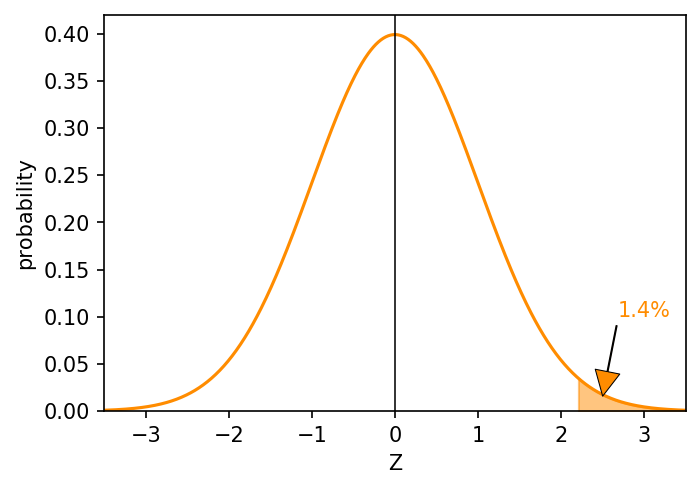

In [8]:
x = np.arange(-6,6,.01)
z = stats.norm.pdf(x,0,1)

plt.figure()
plt.plot(x,z, color = 'darkorange', label = 'Z')

plt.ylim(0,.42)
plt.xticks(np.arange(-5,5,1))
plt.xlim(-3.5,3.5)

plt.xlabel('Z')
plt.ylabel('probability')
xshade = np.where(x>2.2,x,np.NaN)
plt.fill_between(xshade,z,0, color = 'darkorange', edgecolor = 'white', alpha = .5)
plt.annotate(str(round(prob*1000.)/10.) + '%', xy=(2.5,.015),xytext=(3.,.1),
             arrowprops=dict(facecolor='darkorange', shrink=0.01, width = .5, linewidth = .5),
             horizontalalignment = 'center', color = 'darkorange')

plt.axvline(x=0, linewidth = .75, color = 'black')
plt.show()

### t-statistic

The t-statistic is similar to that of the $Z$ (or standard normal), except now we need to include one extra bit of information. Namely, the degrees of freedom. Below is a plot of the $Z$ PDF and the t-statistic PDF for 4 degrees of freedom and 20 degrees of freedom.

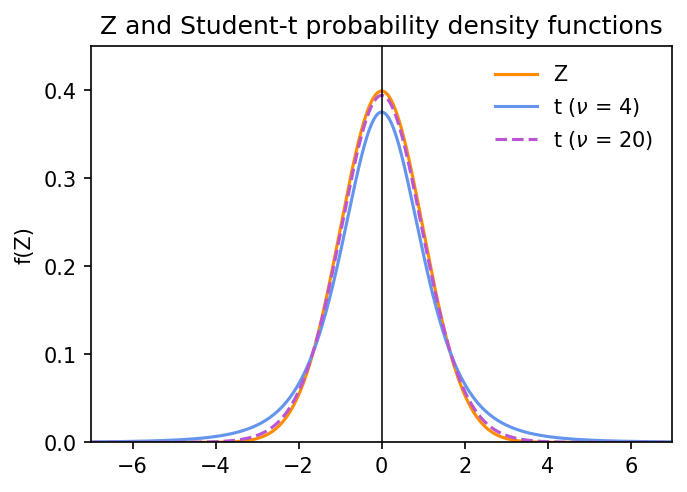

In [9]:
x = np.arange(-10,10,.01)
z = stats.norm.pdf(x,0,1)
t = stats.t.pdf(x,4)
t20 = stats.t.pdf(x,20)

plt.figure()
plt.plot(x,z, color = 'darkorange', label = 'Z')
plt.plot(x,t,linestyle = '-', color = 'cornflowerblue', label = r"t ($\nu$ = 4)")
plt.plot(x,t20,linestyle = '--', color = 'mediumorchid', label = r"t ($\nu$ = 20)")

plt.title('Z and Student-t probability density functions')
plt.ylabel('f(Z)')
plt.legend(frameon = 0)

plt.xlim(-7,7)
plt.ylim(0,.45)
plt.yticks(np.arange(0,.5,.1))

plt.axvline(x=0, linewidth = .75, color = 'black')
plt.show()

If you want to know what the critical t is for the 95% confidence bounds and degrees of freedom DOF = 4, you can use the stats package again...

In [10]:
t_c = stats.t.ppf(.975,loc = 0., scale = 1.0, df = 4)
t_c

2.7764451051977987

1.959963984540054


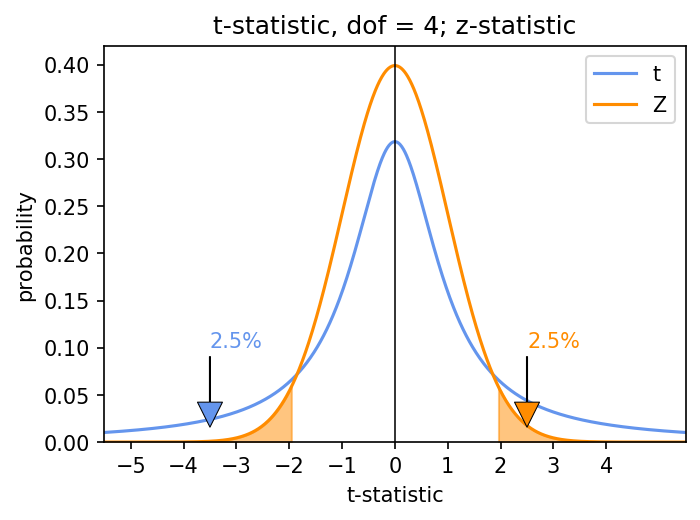

In [11]:
x = np.arange(-6,6,.01)
t = stats.t.pdf(x,loc = 0,scale = 1, df = 1)
t_c = stats.t.ppf(.975,loc = 0., scale = 1.0, df = 1)


plt.figure()
plt.plot(x,t, color = 'cornflowerblue', label = 't')

xshade = np.where(x>t_c,x,np.NaN)
plt.fill_between(xshade,t,0, color = 'cornflowerblue', edgecolor = 'white', alpha = .5)
#plt.annotate('2.5%', xy=(3.5,.015),xytext=(3.,.1),
#             arrowprops=dict(facecolor='cornflowerblue', shrink=0.01, width = .5, linewidth = .5),
#             horizontalalignment = 'center', color = 'cornflowerblue')

xshade = np.where(x<-1.0*t_c,x,np.NaN)
plt.fill_between(xshade,t,0, color = 'cornflowerblue', edgecolor = 'white', alpha = .5)
plt.annotate('2.5%', xy=(-3.5,.015),xytext=(-3.,.1),
             arrowprops=dict(facecolor='cornflowerblue', shrink=0.01, width = .5, linewidth = .5),
             horizontalalignment = 'center', color = 'cornflowerblue')

x = np.arange(-10,10,.01)
z = stats.norm.pdf(x,0,1)
z_c = stats.norm.ppf(.975, loc=0., scale = 1.)
print(z_c)
plt.plot(x,z, color = 'darkorange', label = 'Z')
xshade = np.where(x>z_c,x,np.NaN)
plt.fill_between(xshade,z,0, color = 'darkorange', edgecolor = 'white', alpha = .5)
xshade = np.where(x<-1.0*z_c,x,np.NaN)
plt.fill_between(xshade,z,0, color = 'darkorange', edgecolor = 'white', alpha = .5)
plt.annotate('2.5%', xy=(2.5,.015),xytext=(3.,.1),
             arrowprops=dict(facecolor='darkorange', shrink=0.01, width = .5, linewidth = .5),
             horizontalalignment = 'center', color = 'darkorange')

plt.legend()
plt.ylim(0,.42)
plt.xticks(np.arange(-5,5,1))
plt.xlim(-5.5,5.5)
plt.xlabel('t-statistic')
plt.ylabel('probability')

plt.title('t-statistic, dof = 4; z-statistic')
plt.axvline(x=0, linewidth = .75, color = 'black')
plt.show()

Similar again to the $Z$ statistic, if you get a value of $t = 2.2$ and you want to know the area under the t-distribution with DOF = 4 that falls to the right of this...

In [12]:
prob = 1 - stats.t.cdf(2.2, df = 4, loc = 0.0, scale = 1.0)
prob

0.046326335089817317

So, almost exactly 5%. 

*To see any updated versions of this notebook, visit https://github.com/eabarnes1010/ats655-coursematerial/blob/master/jupyter_notebooks/z-t-coding.ipynb*